In [1]:
import pymisca.ext as pyext
pyext.base__check()


import pymisca.vis_util as pyvis
import matplotlib.pyplot as plt
%matplotlib inline

import synotil.util as sutil


/home/shouldsee/.local/lib/python2.7/site-packages/pymisca/header.py:10: UserWarning: [WARN] NUMPY is not limited cuz NCORE is not set
  warnings.warn("[WARN] NUMPY is not limited cuz NCORE is not set")
/home/shouldsee/.local/lib/python2.7/site-packages/pymisca/header.py:56: UserWarning: [WARN] variable $BASE not set,defaulting to PWD:/home/shouldsee/Documents/repos/metagenomics
  warnings.warn('[WARN] variable ${BASE} not set,defaulting to PWD:{PWD}'.format(**locals()))


pwd -L
[BASE]=/home/shouldsee/Documents/repos/metagenomics


is in ipython: 1 
[WARN]No module named jinja2_util


[WARN] pymisca.vis_util cannot find network
[IMPORT] cannot import "matplotlib_venn"
[FAIL] to process index file:/media/pw_synology3/BrachyPhoton/raw/index, due to [Errno 2] No such file or directory: '/media/pw_synology3/BrachyPhoton/raw/index'
[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
[IMPORT] cannot import "matplotlib_venn"


is in ipython: 1 
[WARN]No module named jinja2_util


In [2]:
# pyext


 [WARN] unable to simplify condName. Exception:list index out of range


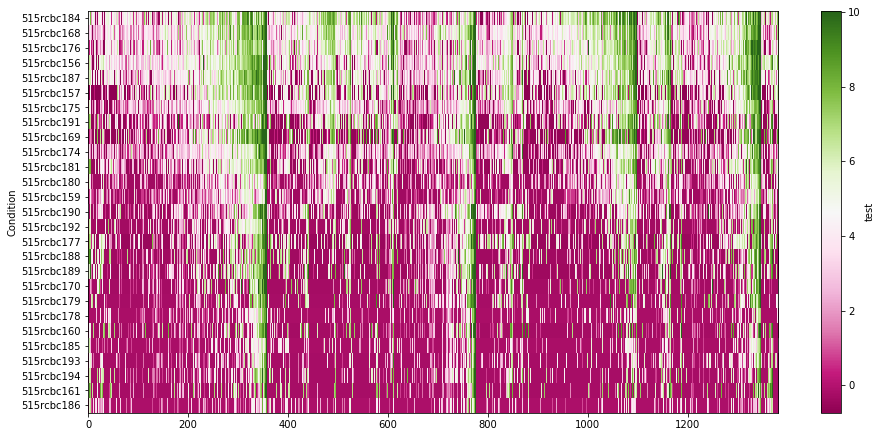

In [10]:

import synotil.CountMatrix as scount
import pandas as pd

dfc = pyext.readData('step1/table_mc30000_sorted_log2.csv')
# print dfc.head()
#dfc = dfc.set_index('OTU ID')
#dfc = dfc.drop(columns = 'taxonomy',)
dfc.head()
libSize = dfc.mean(axis=0)
dfc = dfc - libSize



mdl = sutil.fit_PCA(dfc.T)
xs,ys = mdl.trans_data.T[:2]
#axs= pyvis.qc_2var(xs,ys,nMax=-1,)

PC_results = pd.DataFrame(mdl.trans_data)
PC_results = PC_results.set_index(dfc.columns)
PC_results = PC_results.sort_values(0,ascending=False)

dfc = scount.countMatrix(dfc).qc_Avg();
## M means the average expression of the species of our samples
index = dfc.summary.sort_values('M',ascending=False).index
c_index = PC_results.index



dfc = scount.countMatrix(dfc).qc_Avg()


dfc= dfc.qc_Avg()
dfc.index.name='ind'
indDF = dfc.index.to_frame('ind')
L = 3
indDF['L%d'%L] = indDF.ind.str.split('k__',1).str.get(-1).str.split(';',).str.slice(0,L).map(tuple)
indDF['M'] = dfc.summary['M']
indDF['L%d'%L] = indDF['L%d'%L].map(';'.join)


# dfc = dfc.reindex(index)
dfc = dfc.reindex(indDF.sort_values(['L%d'%L,'M']).index)
dfc = dfc.reindex(dfc.index & dfc.summary.query('per_M>0.9').index)
dfc = dfc.reindex(columns=c_index)
# dfc.heatmap(figsize=[12,6])
dfc = dfc.setDF(dfc)
dfc.heatmap(figsize=[12,6])


 [WARN] unable to simplify condName. Exception:list index out of range


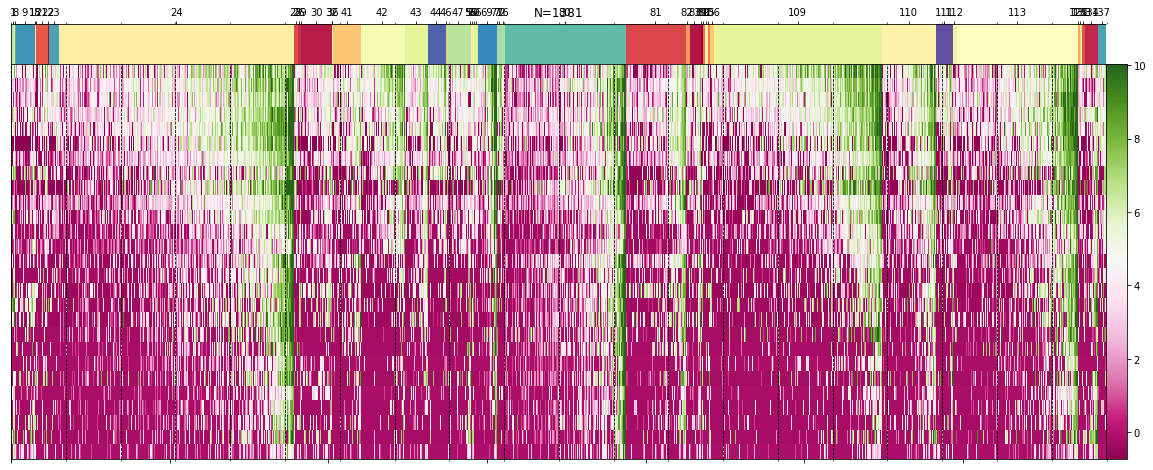

In [11]:

import synotil.PanelPlot as spanel

# indDF['L3']
clu = indDF['L%d'%L].astype('category')
### output lookup table
clu.cat.categories.to_frame().reset_index(drop=1).to_csv('step2/L%d-lookup.csv'%L)

# clu = pd.factorize(clu)
# clu = clu.cat.codes.to_frame('clu')
indDF['L%d_int'%L] = clu
cluTrack = spanel.fixCluster(clu.cat.codes)


dfc.height=10.
pp = spanel.panelPlot([cluTrack,dfc],figsize=[20,8])
pp.index = dfc.index
pp.render(order=indDF[['L%d_int'%L,'M']],);

plt.savefig('step2/L%s_heatmap')


In [27]:
 clu.cat.categories[18]

'Bacteria; p__Firmicutes'

In [26]:
clu.cat.categories[5], clu.cat.categories[31],
# , clu.cat.categories[113]

('Bacteria; p__Actinobacteria', 'Bacteria; p__Proteobacteria')

In [22]:
clu.cat.categories[24], clu.cat.categories[109], clu.cat.categories[113]

('Bacteria; p__Actinobacteria; c__Actinobacteria',
 'Bacteria; p__Proteobacteria; c__Alphaproteobacteria',
 'Bacteria; p__Proteobacteria; c__Gammaproteobacteria')

mkdir -p step2


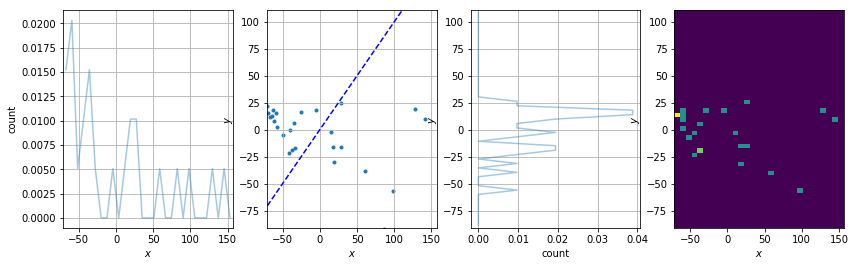

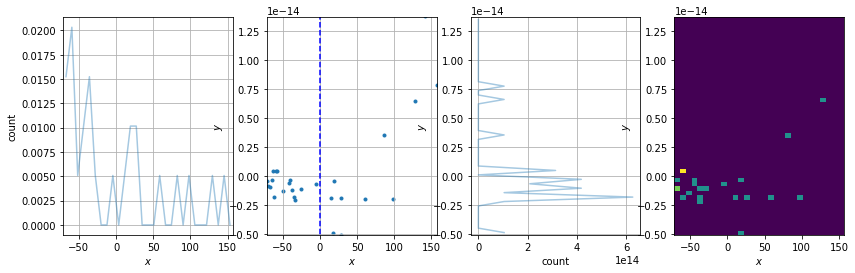

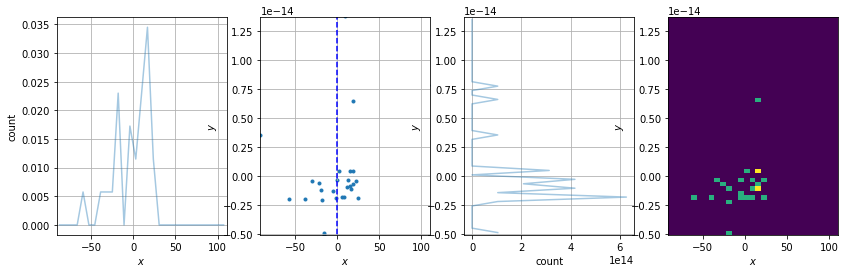

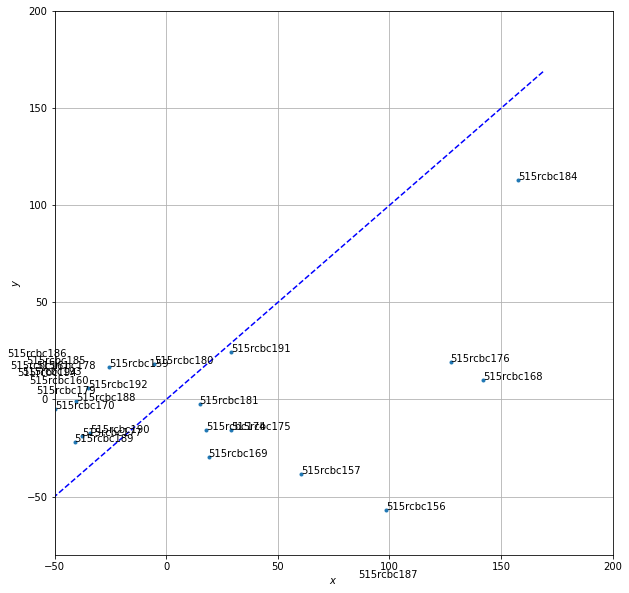

In [7]:

import synotil.CountMatrix as scount
import pandas as pd

dfc = pyext.readData('step1/table_mc30000_sorted_log2.csv')
# print dfc.head()
#dfc = dfc.set_index('OTU ID')
#dfc = dfc.drop(columns = 'taxonomy',)
dfc.head()
libSize = dfc.mean(axis=0)
dfc = dfc - libSize

# axs= pyvis.qc_2var(xs,ys,nMax=-1,xlim=[-500,2500],)
# ! mkdir -p step1
DIR = 'step2'

pyext.shellexec('mkdir -p {DIR}'.format(**locals()))

mdl = sutil.fit_PCA(dfc.T)
xs,ys = mdl.trans_data.T[:2]
axs= pyvis.qc_2var(xs,ys,nMax=-1,)

plt.savefig('{DIR}/PCA.png'.format(**locals()))

libSize = dfc.mean(axis=0)

pyvis.qc_2var(xs, libSize)
plt.savefig('{DIR}/PC1-libSize.png'.format(**locals()))

pyvis.qc_2var(ys, libSize)
plt.savefig('{DIR}/PC2-libSize.png'.format(**locals()))

dfc.to_csv('{DIR}/table_mc30000_sorted_log2.csv'.format(**locals()))




mdl = sutil.fit_PCA(dfc.T)
xs,ys = mdl.trans_data.T[:2]
fig,ax = plt.subplots(1,1,figsize=[10,10])
axs= pyvis.qc_2var(xs,ys,nMax=-1,axs=[None,ax,None,None],xlim=[-50,200],ylim=[-80,200])
pyvis.add_text(xs,ys,labs=dfc.columns,checkNA=0,ax=axs[1])

